# Матвеев Александр Игоревич ИД22-2. Приложение А.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

In [2]:
aisles = pd.read_csv("./Data/aisles.csv")
departments = pd.read_csv("./Data/departments.csv")
order_products__prior = pd.read_csv("./Data/order_products__prior.csv")
order_products__train = pd.read_csv("./Data/order_products__train.csv")
orders = pd.read_csv("./Data/orders.csv")
products = pd.read_csv("./Data/Products.csv")

## Описание данных

## Aisles

In [2]:
aisles = pd.read_csv("./Data/aisles.csv")

In [3]:
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [4]:
aisles.shape

(134, 2)

In [5]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
aisles[aisles.duplicated(keep=False)]

,aisle_id,aisle


In [7]:
aisles.isna().sum()

aisle_id    0
aisle       0
dtype: int64

## Departments

In [3]:
departments = pd.read_csv("./Data/departments.csv")

In [9]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [10]:
departments.shape

(21, 2)

In [11]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [12]:
departments[departments.duplicated(keep=False)]

,department_id,department


In [13]:
departments.isna().sum()

department_id    0
department       0
dtype: int64

## Order_products__prior

In [4]:
order_products__prior = pd.read_csv("./Data/order_products__prior.csv")

In [15]:
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [16]:
order_products__prior[order_products__prior['product_id'] == 39276]

,order_id,product_id,add_to_cart_order,reordered
394,49,39276,2,1
4531,469,39276,4,1
8394,872,39276,3,0
15127,1568,39276,4,1
16230,1699,39276,1,1
...,...,...,...,...
32409274,3418456,39276,1,1
32411266,3418651,39276,5,1
32422592,3419872,39276,10,1
32429034,3420516,39276,4,0


In [17]:
order_products__prior.shape

(32434489, 4)

In [18]:
order_products__prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [19]:
order_products__prior[order_products__prior.duplicated(keep=False)]

,order_id,product_id,add_to_cart_order,reordered


In [20]:
order_products__prior.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

## Order_products__train

In [5]:
order_products__train = pd.read_csv("./Data/order_products__train.csv")

In [22]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [23]:
order_products__train.shape

(1384617, 4)

In [24]:
order_products__train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [25]:
order_products__train[order_products__train.duplicated(keep=False)]

,order_id,product_id,add_to_cart_order,reordered


In [26]:
order_products__train.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

## Orders

In [6]:
orders = pd.read_csv("./Data/orders.csv")

In [28]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [29]:
orders[orders['user_id'] == 257]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
4089,1917123,257,prior,1,0,18,NaN
4090,479079,257,prior,2,2,12,2.0
4091,933727,257,prior,3,6,21,4.0
4092,999943,257,prior,4,6,22,7.0
4093,1915500,257,prior,5,4,13,5.0
4094,402235,257,prior,6,3,18,6.0
4095,772262,257,prior,7,6,18,3.0
4096,250369,257,prior,8,0,18,1.0
4097,3135054,257,prior,9,5,22,5.0
4098,2643540,257,prior,10,0,12,2.0


In [30]:
orders['eval_set'].unique()

array(['prior', 'train', 'test'], dtype=object)

In [31]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [32]:
orders.shape

(3421083, 7)

In [33]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [34]:
orders[orders.duplicated(keep=False)]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [35]:
orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

## Products

In [7]:
products = pd.read_csv("./Data/Products.csv")

In [37]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [38]:
products.shape

(49688, 4)

In [39]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [40]:
products[products.duplicated(keep=False)]

,product_id,product_name,aisle_id,department_id


In [41]:
products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

## Sample_submission

In [8]:
sample_submission = pd.read_csv("./Data/sample_submission.csv")

In [43]:
sample_submission.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [44]:
sample_submission.shape

(75000, 2)

In [45]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  75000 non-null  int64 
 1   products  75000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [46]:
sample_submission[sample_submission.duplicated(keep=False)]

,order_id,products


In [47]:
sample_submission.isna().sum()

order_id    0
products    0
dtype: int64

# Анализ покупательского поведения

## Распределение количества заказов на пользователя

In [48]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [49]:
user_order_counts = orders.groupby("user_id").size()

# Считаем, сколько пользователей сделали определенное количество заказов
order_count_distribution = user_order_counts.value_counts().sort_index()

In [50]:
user_order_counts

user_id
1         11
2         15
3         13
4          6
5          5
          ..
206205     4
206206    68
206207    17
206208    50
206209    14
Length: 206209, dtype: int64

In [51]:
mean_amount_orders = int(user_order_counts.mean())
mean_amount_orders

16

In [52]:
order_count_distribution

4      23986
5      19590
6      16165
7      13850
8      11700
       ...  
96        67
97        54
98        50
99        47
100     1374
Length: 97, dtype: int64

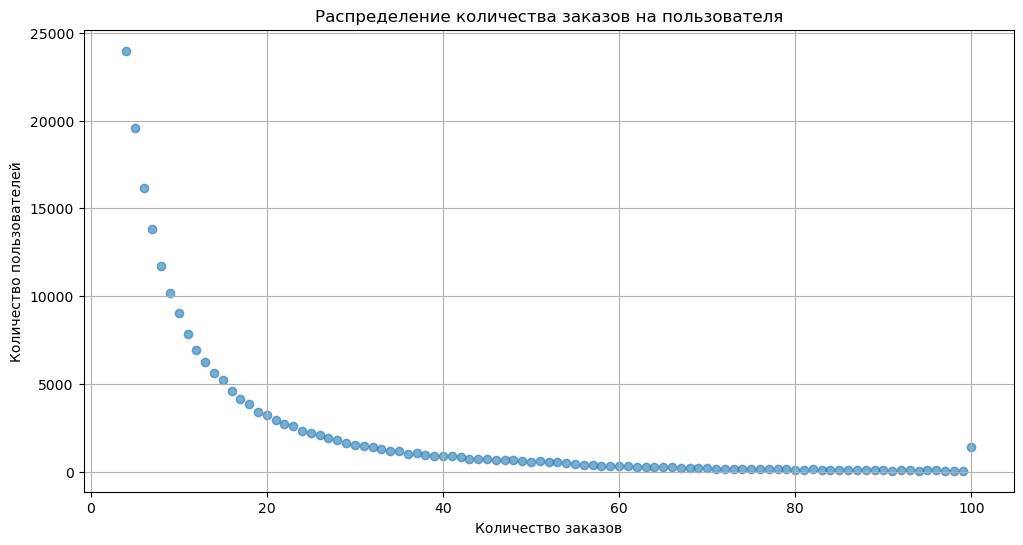

In [53]:
plt.figure(figsize=(12, 6))
plt.scatter(order_count_distribution.index, order_count_distribution.values, alpha=0.6)
plt.title("Распределение количества заказов на пользователя")
plt.xlabel("Количество заказов")
plt.ylabel("Количество пользователей")
plt.grid(True)
plt.show()

In [54]:
print("Среднее кол-во заказов:", mean_amount_orders)

Среднее кол-во заказов: 16


## Распределение количества продуктов на заказы

In [3]:
order_products_train_prior = pd.concat([order_products__train, order_products__prior], axis=0, ignore_index=True)

In [56]:
order_product_counts = order_products_train_prior.groupby('order_id').size()
order_product_counts

order_id
1           8
2           9
3           8
4          13
5          26
           ..
3421079     1
3421080     9
3421081     7
3421082     7
3421083    10
Length: 3346083, dtype: int64

In [57]:
mean_amount_products = int(order_product_counts.mean())
mean_amount_products

10

In [58]:
product_count_distribution = order_product_counts.value_counts()
product_count_distribution[:5]

5    237225
6    236383
4    230299
7    228547
3    215060
dtype: int64

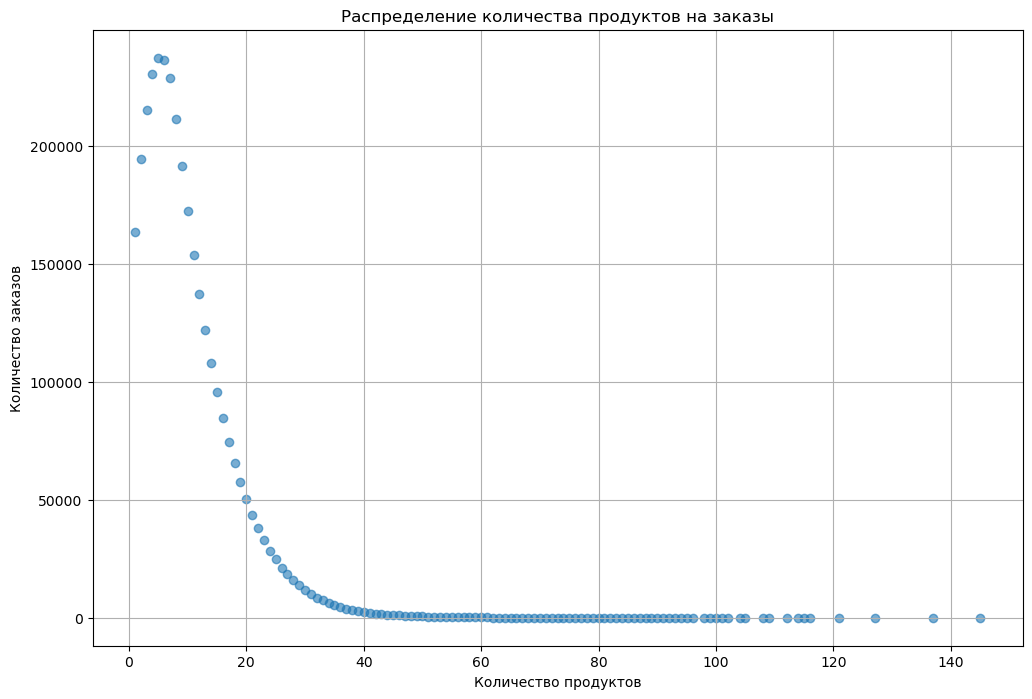

In [59]:
plt.figure(figsize=(12, 8))
plt.title('Распределение количества продуктов на заказы')
plt.scatter(product_count_distribution.index, product_count_distribution.values, alpha=0.6)
plt.xlabel('Количество продуктов')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.show()

In [60]:
print("Среднее кол-во продуктов в заказе:", mean_amount_products)

Среднее кол-во продуктов в заказе: 10


## Количество заказов в конкретный день недели

In [4]:
dow_order_count = orders.groupby('order_dow').size()
dow_order_count

order_dow
0    600905
1    587478
2    467260
3    436972
4    426339
5    453368
6    448761
dtype: int64

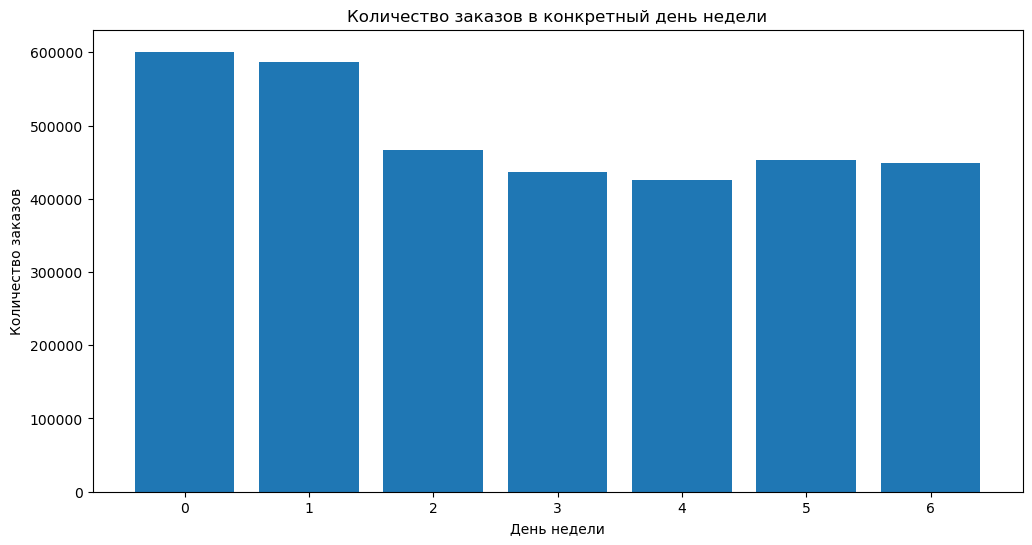

In [5]:
plt.figure(figsize=(12, 6))
plt.bar(dow_order_count.index, dow_order_count.values)
plt.title("Количество заказов в конкретный день недели")
plt.xlabel('День недели')
plt.ylabel('Количество заказов')
plt.show()

In [63]:
most_frequency_dow = np.argmax(dow_order_count)
print("В этот день чаще всего делают покупки:", most_frequency_dow)

В этот день чаще всего делают покупки: 0


## Количество заказов в определённое время суток

In [6]:
hour_order_count = orders.groupby('order_hour_of_day').size()
hour_order_count

order_hour_of_day
0      22758
1      12398
2       7539
3       5474
4       5527
5       9569
6      30529
7      91868
8     178201
9     257812
10    288418
11    284728
12    272841
13    277999
14    283042
15    283639
16    272553
17    228795
18    182912
19    140569
20    104292
21     78109
22     61468
23     40043
dtype: int64

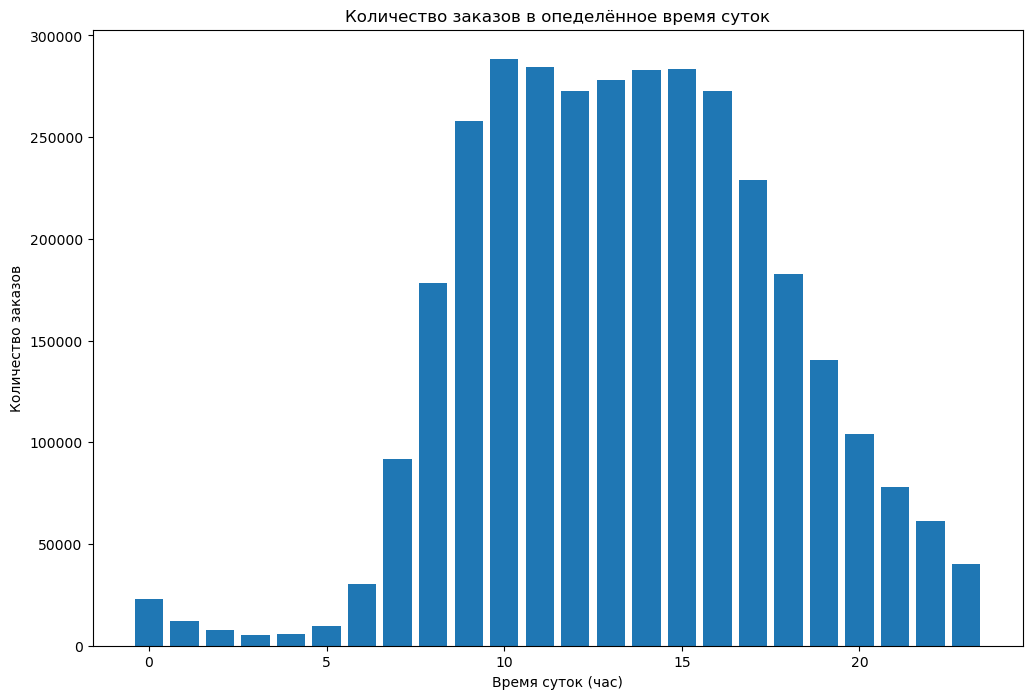

In [7]:
plt.figure(figsize=(12, 8))
plt.bar(hour_order_count.index, hour_order_count.values)
plt.title("Количество заказов в опеделённое время суток")
plt.xlabel('Время суток (час)')
plt.ylabel('Количество заказов')
plt.show()

In [96]:
most_frequency_hour = np.argmax(hour_order_count)
print("В этот час чаще всего делают покупки:", most_frequency_hour)

В этот час чаще всего делают покупки: 10


## Количество продуктов в каждом из департаментов

In [8]:
department_id = products['department_id'].value_counts().index # находим уникальные id все департаментов
df_department_id = pd.DataFrame(data=department_id, columns=['department_id'])
department_names = df_department_id.merge(departments, on='department_id', how='left') 
count_department_id = products['department_id'].value_counts().values # сколько раз упоминается каждый департамент в таблице продукты
count_department_id

array([6563, 6264, 5371, 4365, 4007, 3449, 3085, 2092, 1858, 1684, 1516,
       1322, 1258, 1139, 1115, 1081, 1054,  972,  907,  548,   38],
      dtype=int64)

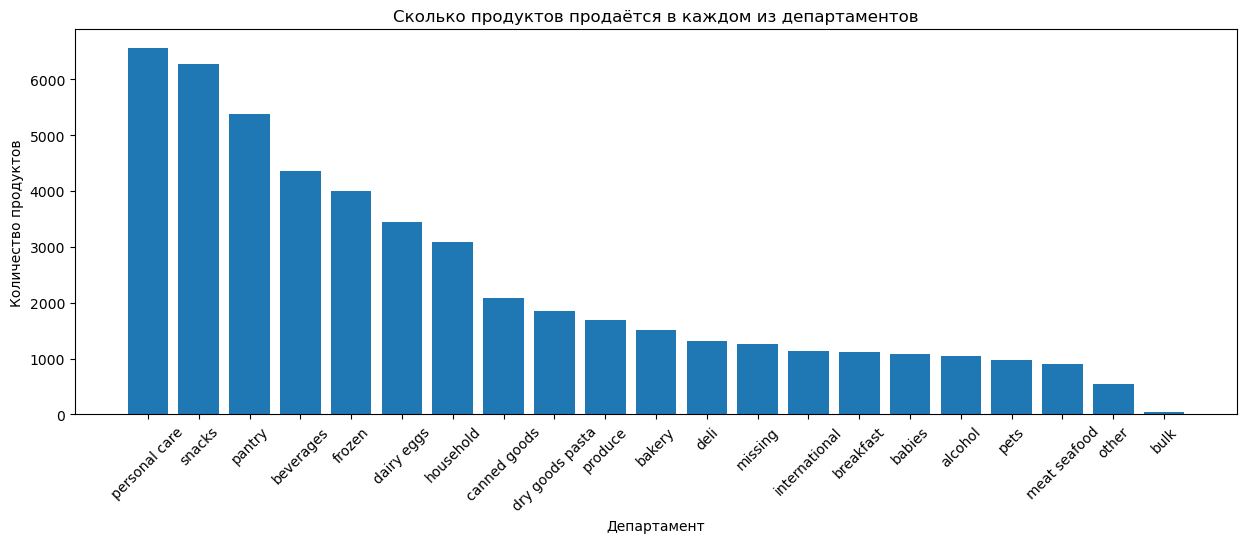

In [9]:
plt.figure(figsize=(15, 5))
plt.bar(department_names['department'], count_department_id)
plt.xticks(rotation=45)
plt.xlabel('Департамент')
plt.ylabel('Количество продуктов')
plt.title('Сколько продуктов продаётся в каждом из департаментов')
plt.show()

## Количество заказов для каждого департамента

In [10]:
order_products_train_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [11]:
product_department_count= 1

In [12]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [13]:
order_products_train_prior = order_products_train_prior.merge(products, on='product_id')

In [14]:
order_products_train_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16


In [15]:
product_department_count = order_products_train_prior.groupby('department_id').size()
product_department_count = pd.DataFrame(data={'department_id':product_department_count.index, \
                                              'amount': product_department_count.values}).merge(departments, on='department_id')
product_department_count

,department_id,amount,department
0,1,2336858,frozen
1,2,38086,other
2,3,1225181,bakery
3,4,9888378,produce
4,5,159294,alcohol
5,6,281155,international
6,7,2804175,beverages
7,8,102221,pets
8,9,905340,dry goods pasta
9,10,35932,bulk


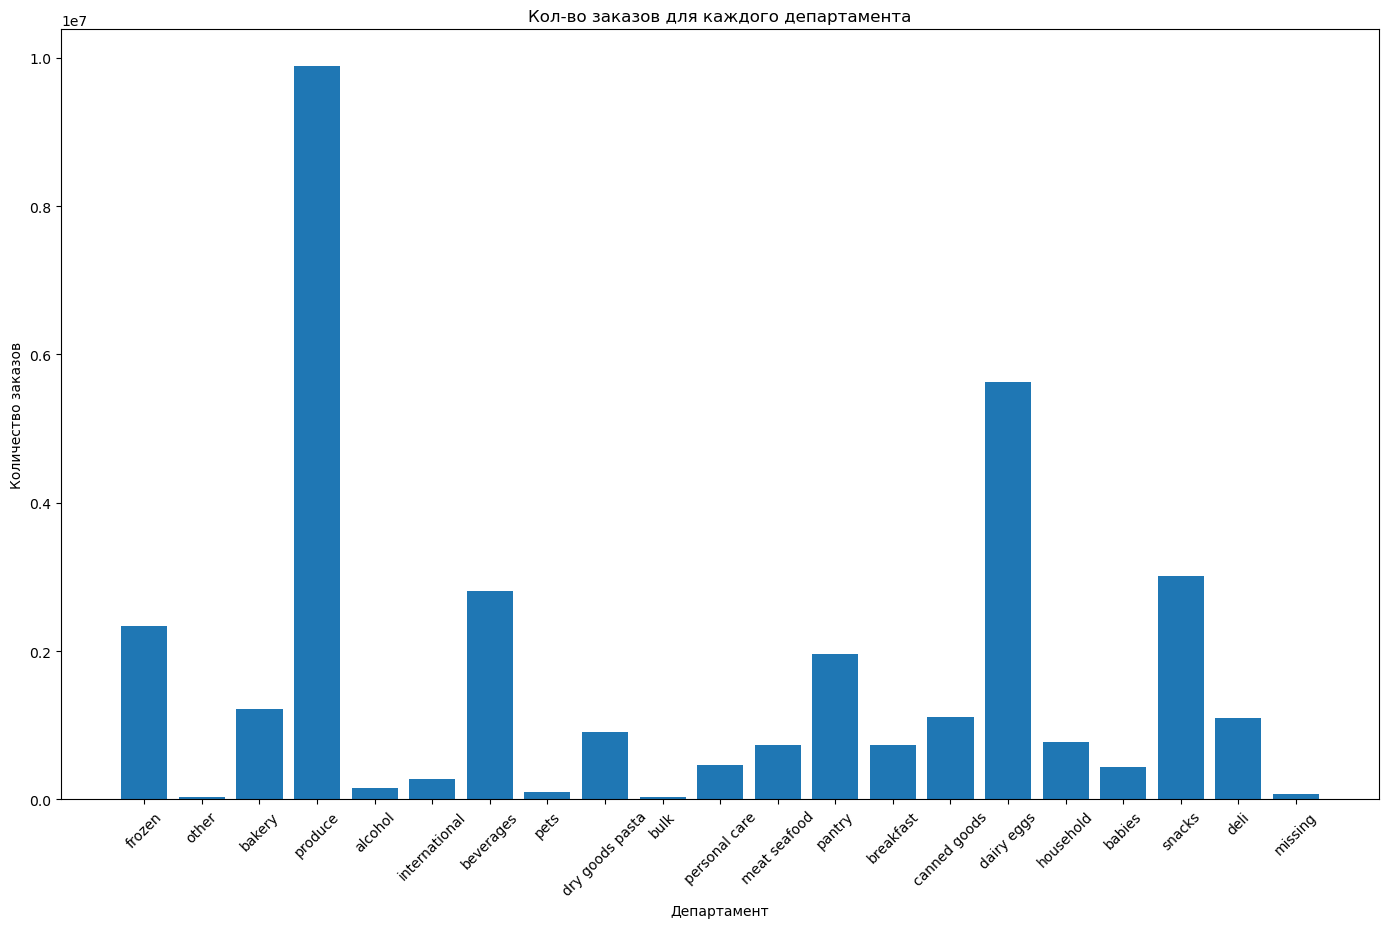

In [16]:
plt.figure(figsize=(17, 10))
plt.bar(product_department_count['department'], product_department_count['amount'])
plt.xticks(rotation=45)
plt.xlabel('Департамент')
plt.ylabel('Количество заказов')
plt.title('Кол-во заказов для каждого департамента')
plt.show()

## Количество дней с последнего заказа

In [17]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [18]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [19]:
orders[orders['days_since_prior_order']==0.0]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
8,2295261,1,prior,9,1,16,0.0
43,2557754,4,prior,5,5,13,0.0
189,2148135,17,prior,30,6,15,0.0
296,965160,24,train,19,0,16,0.0
337,3162630,27,prior,24,2,15,0.0
...,...,...,...,...,...,...,...
3420980,4277,206206,prior,47,2,17,0.0
3420985,648225,206206,prior,52,0,19,0.0
3420991,2475308,206206,prior,58,0,15,0.0
3421001,1043943,206206,test,68,0,20,0.0


In [20]:
last_order_count = orders.groupby('days_since_prior_order').size()
last_order_count

days_since_prior_order
0.0      67755
1.0     145247
2.0     193206
3.0     217005
4.0     221696
5.0     214503
6.0     240013
7.0     320608
8.0     181717
9.0     118188
10.0     95186
11.0     80970
12.0     76146
13.0     83214
14.0    100230
15.0     66579
16.0     46941
17.0     39245
18.0     35881
19.0     34384
20.0     38527
21.0     45470
22.0     32012
23.0     23885
24.0     20712
25.0     19234
26.0     19016
27.0     22013
28.0     26777
29.0     19191
30.0    369323
dtype: int64

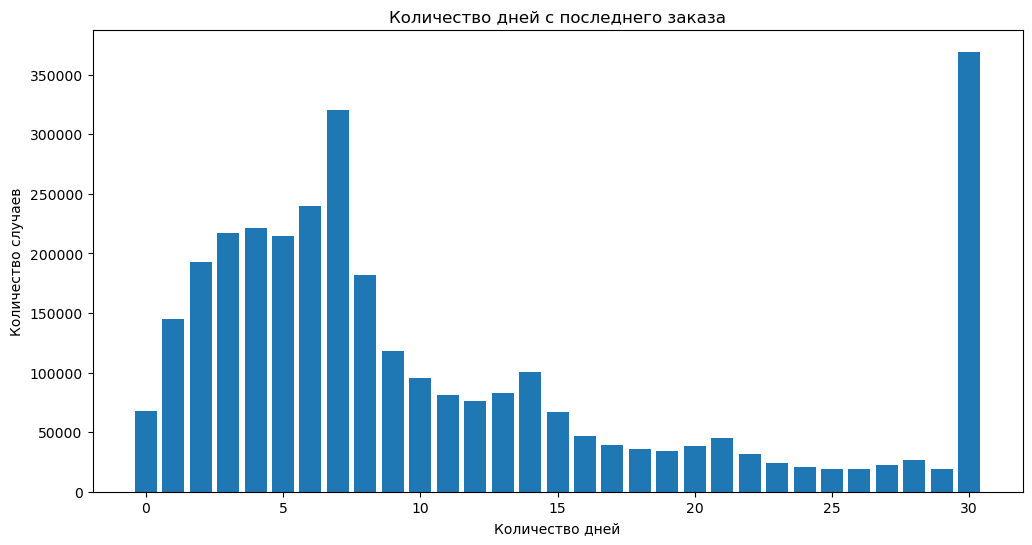

In [21]:
plt.figure(figsize=(12, 6))
plt.bar(last_order_count.index, last_order_count.values)
plt.title("Количество дней с последнего заказа")
plt.xlabel('Количество дней')
plt.ylabel('Количество случаев')
plt.show()

## Процент повторных заказов в каждом департаменте

In [22]:
order_products_train_prior = pd.concat([order_products__prior, order_products__train])
merged_data = order_products_train_prior.merge(products, on='product_id').merge(departments, on='department_id')
merged_data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,dairy eggs


In [23]:
# Расчет reorder rate
reorder_rate = (
    merged_data.groupby('department')['reordered']
    .mean()  # Среднее значение reordered для каждого департамента
    .reset_index()
    .rename(columns={'reordered': 'reorder_rate'})
)

In [24]:
# Сортировка для удобства
#reorder_rate = reorder_rate.sort_values(by='reorder_rate', ascending=False)

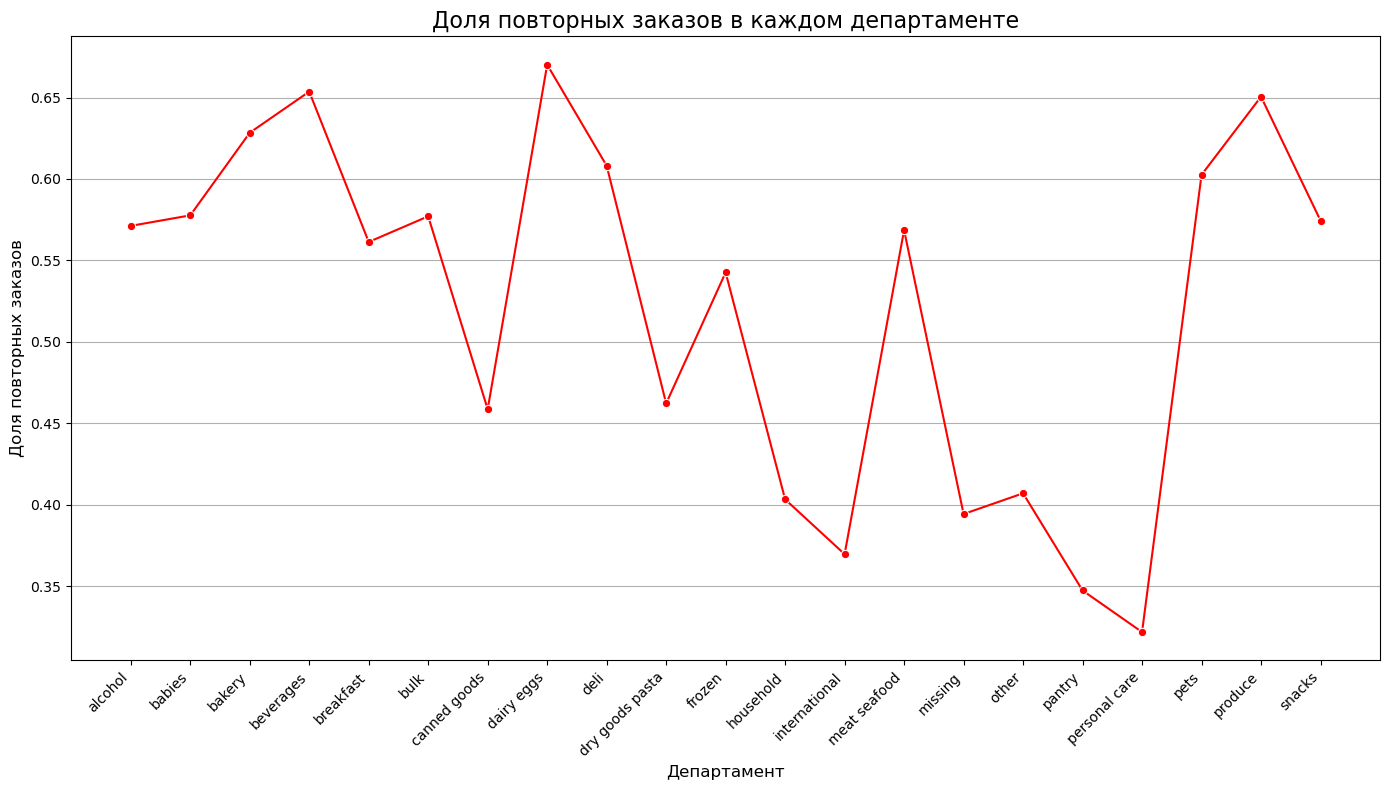

In [25]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=reorder_rate, x='department', y='reorder_rate', marker='o', color='red')
plt.xticks(rotation=45, ha='right')
plt.title('Доля повторных заказов в каждом департаменте', fontsize=16)
plt.xlabel('Департамент', fontsize=12)
plt.ylabel('Доля повторных заказов', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Доля продуктов, которые заказываются повторно

In [81]:
order_products__prior['reordered'].sum() / order_products__prior.shape[0]

0.5896974667922161

In [82]:
order_products__train['reordered'].sum() / order_products__train.shape[0]

0.5985944127509629

## Доля продуктов, которые не были заказаны повторно

In [83]:
grouped_df = order_products__prior.groupby('order_id')['reordered'].aggregate("sum").reset_index()
grouped_df

,order_id,reordered
0,2,6
1,3,8
2,4,12
3,5,21
4,6,0
...,...,...
3214869,3421079,0
3214870,3421080,4
3214871,3421081,0
3214872,3421082,4


In [84]:
grouped_df["reordered"][grouped_df['reordered'] > 0] = 1
grouped_df

,order_id,reordered
0,2,1
1,3,1
2,4,1
3,5,1
4,6,0
...,...,...
3214869,3421079,0
3214870,3421080,1
3214871,3421081,0
3214872,3421082,1


In [85]:
grouped_df['reordered'].value_counts() / grouped_df.shape[0]

1    0.879151
0    0.120849
Name: reordered, dtype: float64

In [86]:
grouped_df = order_products__train.groupby('order_id')['reordered'].aggregate("sum").reset_index()
grouped_df

,order_id,reordered
0,1,4
1,36,6
2,38,1
3,96,5
4,98,45
...,...,...
131204,3421049,1
131205,3421056,3
131206,3421058,7
131207,3421063,4


In [87]:
grouped_df["reordered"][grouped_df['reordered'] > 0] = 1
grouped_df

,order_id,reordered
0,1,1
1,36,1
2,38,1
3,96,1
4,98,1
...,...,...
131204,3421049,1
131205,3421056,1
131206,3421058,1
131207,3421063,1


In [88]:
grouped_df['reordered'].value_counts() / grouped_df.shape[0]

1    0.93444
0    0.06556
Name: reordered, dtype: float64

## Самые популярные товары

In [89]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [12]:
merged_data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,dairy eggs


In [13]:
product_count = merged_data.groupby('product_name').size()
product_count = pd.DataFrame(data={'product_name': product_count.index, \
                                   'product_amount': product_count.values})
product_count.sort_values(by=['product_amount'], ascending=False, inplace=True)

In [14]:
product_count[product_count['product_name'] == 'Cucumber Kirby']

,product_name,product_amount
11632,Cucumber Kirby,99728


In [17]:
product_count.head(20)

,product_name,product_amount
3677,Banana,491291
3472,Bag of Organic Bananas,394930
31923,Organic Strawberries,275577
28843,Organic Baby Spinach,251705
30300,Organic Hass Avocado,220877
28807,Organic Avocado,184224
22415,Large Lemon,160792
42908,Strawberries,149445
23422,Limes,146660
32481,Organic Whole Milk,142813


In [19]:
product_count[product_count['product_amount'] < 100]

,product_name,product_amount
9,0 Calorie Acai Raspberry Water Beverage,99
20608,Humm! Greek Olives Hummus,99
6933,"Cayenne Pepper, Organic",99
6202,Caffeine Free Cola,99
36643,Pure Ground,99
...,...,...
18467,Greek Blended Cherry Fat Free Yogurt,1
1913,All Natural Stevia Liquid Extract Sweetener,1
16036,"Frittata, Farmer's Market",1
24646,Max White With Polishing Star Soft Toothbrush,1


## Наиболее часто покупаемые комбинации товаров

In [10]:
order_products = order_products_train_prior.merge(products, on="product_id", how="left")


In [39]:
basket = order_products.groupby("order_id")["product_name"].apply(list)

In [12]:
basket

order_id
1          [Bulgarian Yogurt, Organic 4% Milk Fat Whole M...
2          [Organic Egg Whites, Michigan Organic Kale, Ga...
3          [Total 2% with Strawberry Lowfat Greek Straine...
4          [Plain Pre-Sliced Bagels, Honey/Lemon Cough Dr...
5          [Bag of Organic Bananas, Just Crisp, Parmesan,...
                                 ...                        
3421079                                      [Moisture Soap]
3421080    [Organic Whole Milk, Vanilla Bean Ice Cream, O...
3421081    [Hint of Lime Flavored Tortilla Chips, Classic...
3421082    [Fresh 99% Lean Ground Turkey, Original Spray,...
3421083    [Freeze Dried Mango Slices, Purple Carrot & bl...
Name: product_name, Length: 3346083, dtype: object

In [29]:
from efficient_apriori import apriori

In [44]:
itemsets, rules = apriori(basket, min_support=0.01, min_confidence=0.1)

In [45]:
print("Частые наборы товаров")
for itemset, support in itemsets.items():
    print(f"{itemset}: {support}")

Частые наборы товаров
1: {('Cucumber Kirby',): 99728, ('Bag of Organic Bananas',): 394930, ('Organic Hass Avocado',): 220877, ('Organic Whole String Cheese',): 61669, ('Michigan Organic Kale',): 70076, ('Carrots',): 75233, ('Unsweetened Almondmilk',): 51738, ('Organic Baby Spinach',): 251705, ('Organic Ginger Root',): 54094, ('Organic Raspberries',): 142603, ('2% Reduced Fat Milk',): 38631, ('Extra Virgin Olive Oil',): 52323, ('Banana',): 491291, ('Organic Cilantro',): 73050, ('Organic Avocado',): 184224, ('Yellow Onions',): 76929, ('Organic Strawberries',): 275577, ('Organic Black Beans',): 39577, ('Organic Half & Half',): 79006, ('Soda',): 37298, ('Sparkling Natural Mineral Water',): 44737, ('Organic Whole Milk',): 142813, ('Organic Broccoli Florets',): 34248, ('Honeycrisp Apple',): 83320, ('Spring Water',): 58312, ('Red Vine Tomato',): 56643, ('Sparkling Water Grapefruit',): 79245, ('Asparagus',): 71151, ('Organic Baby Carrots',): 80493, ('Organic Red Onion',): 70804, ('Organic Unsw

In [46]:
print("\nПравила ассоциации:")
for rule in rules:
    print(rule)


Правила ассоциации:
{Organic Baby Spinach} -> {Bag of Organic Bananas} (conf: 0.209, supp: 0.016, lift: 1.771, conv: 1.115)
{Bag of Organic Bananas} -> {Organic Baby Spinach} (conf: 0.133, supp: 0.016, lift: 1.771, conv: 1.067)
{Organic Hass Avocado} -> {Bag of Organic Bananas} (conf: 0.293, supp: 0.019, lift: 2.484, conv: 1.248)
{Bag of Organic Bananas} -> {Organic Hass Avocado} (conf: 0.164, supp: 0.019, lift: 2.484, conv: 1.117)
{Organic Raspberries} -> {Bag of Organic Bananas} (conf: 0.297, supp: 0.013, lift: 2.512, conv: 1.254)
{Bag of Organic Bananas} -> {Organic Raspberries} (conf: 0.107, supp: 0.013, lift: 2.512, conv: 1.072)
{Organic Strawberries} -> {Bag of Organic Bananas} (conf: 0.235, supp: 0.019, lift: 1.989, conv: 1.153)
{Bag of Organic Bananas} -> {Organic Strawberries} (conf: 0.164, supp: 0.019, lift: 1.989, conv: 1.097)
{Large Lemon} -> {Banana} (conf: 0.268, supp: 0.013, lift: 1.823, conv: 1.165)
{Organic Avocado} -> {Banana} (conf: 0.302, supp: 0.017, lift: 2.056, 

In [47]:
order_products__train.head(20)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [9]:
orders_train = orders[orders['eval_set'] == 'train']

In [10]:
orders_train.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0


In [11]:
orders_train.shape

(131209, 7)